In [1]:
"""
network_analysis_examples.ipynb

Created on Sun Mar 19 2023

@author: Lukas

This notebook serves as a playground for the code in the
network analysis repo.
"""

'\nnetwork_analysis_examples.ipynb\n\nCreated on Sun Mar 19 2023\n\n@author: Lukas\n\nThis notebook serves as a playground for the code in the\nnetwork analysis repo.\n'

In [ ]:
# only need to run this in Colab

! git clone https://github.com/LFesser97/Predoc.git
%cd "/content/Predoc/network_analysis"

In [1]:
# import packages

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# import other files from this project

import network_dataset_objects as ndo

In [2]:
# create an empty pandas dataframe with columns "Name", "Type", "Suppliers", and "Shareholders"

df = pd.DataFrame(columns=["name", "type", "suppliers", "shareholders"])


# populate the dataframe

df = df.append({"name": "Company A", "type": "Company", "suppliers": ["Company B", "Company C"], "shareholders": ["Bank A", "Individual A"]}, ignore_index=True)
df = df.append({"name": "Company B", "type": "Company", "suppliers": ["Company C", "Company D"], "shareholders": ["Bank A", "Individual B"]}, ignore_index=True)
df = df.append({"name": "Company C", "type": "Company", "suppliers": ["Company D"], "shareholders": ["Bank B", "Individual A"]}, ignore_index=True)
df = df.append({"name": "Company D", "type": "Company", "suppliers": [], "shareholders": ["Bank B", "Individual C"]}, ignore_index=True)

C:\Users\Lukas\AppData\Local\Temp\ipykernel_13012\3218148245.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"name": "Company A", "type": "Company", "suppliers": ["Company B", "Company C"], "shareholders": ["Bank A", "Individual A"]}, ignore_index=True)
C:\Users\Lukas\AppData\Local\Temp\ipykernel_13012\3218148245.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"name": "Company B", "type": "Company", "suppliers": ["Company C", "Company D"], "shareholders": ["Bank A", "Individual B"]}, ignore_index=True)
C:\Users\Lukas\AppData\Local\Temp\ipykernel_13012\3218148245.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"name": "Company C", "type": "Company", "suppliers": ["

In [3]:
df

,name,type,suppliers,shareholders
0,Company A,Company,"[Company B, Company C]","[Bank A, Individual A]"
1,Company B,Company,"[Company C, Company D]","[Bank A, Individual B]"
2,Company C,Company,[Company D],"[Bank B, Individual A]"
3,Company D,Company,[],"[Bank B, Individual C]"


In [4]:
# create an empty NetworkDataset object and read in the pandas dataframe

example = ndo.NetworkDataset()

example.dataset = df

**Homogeneous Networks**

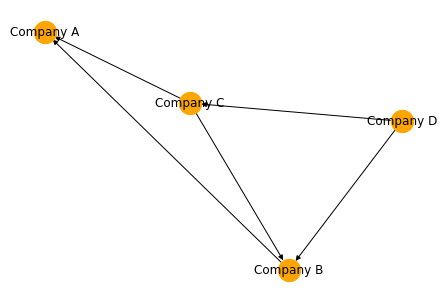

In [5]:
# create and plot supplier network

example.create_homogeneous_network("supplier")

example.networks['supplier'].visualize_network()

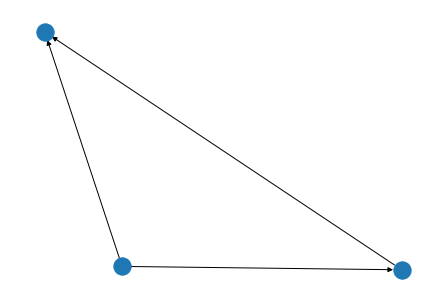

In [6]:
# plot a motif we're interested in

my_favorite_motif = nx.DiGraph([(1,2),(1,3),(2,3)])

nx.draw(my_favorite_motif)

In [7]:
# add the motif to the supplier network

example.networks['supplier'].create_motif("my_favorite_motif", my_favorite_motif)

example.networks['supplier'].count_motif_frequency("my_favorite_motif")

example.networks['supplier'].motifs['my_favorite_motif'].frequency

2

**Heterogeneous Networks**

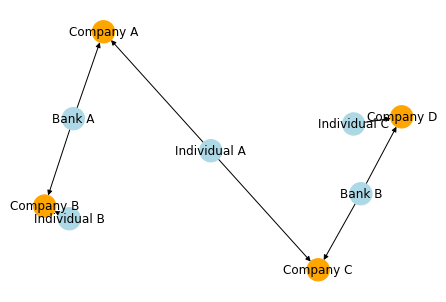

In [8]:
# create and plot shareholder network

example.create_homogeneous_network("shareholder")

example.networks['shareholder'].visualize_network()

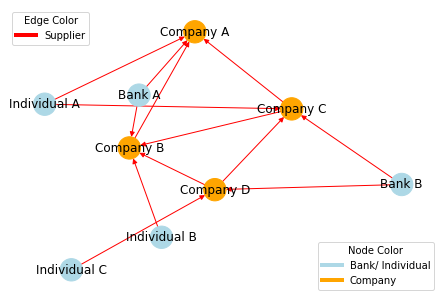

In [9]:
# connect supplier and shareholder networks into a heterogeneous network and plot the result

example.create_heterogeneous_network("supplier", "shareholder")

example.knowledge_graphs['supplier_shareholder'].visualize()

In [13]:
# connect supplier and shareholder networks into a heterogeneous network and plot the result

example.create_heterogeneous_network("shareholder", "supplier")

example.knowledge_graphs['shareholder_supplier'].graph.edges.data()

OutEdgeDataView([('Bank A', 'Company A', {}), ('Bank A', 'Company B', {}), ('Individual A', 'Company A', {}), ('Individual A', 'Company C', {}), ('Company B', 'Company A', {'type': 'shareholder'}), ('Individual B', 'Company B', {}), ('Bank B', 'Company C', {}), ('Bank B', 'Company D', {}), ('Company C', 'Company A', {'type': 'shareholder'}), ('Company C', 'Company B', {'type': 'shareholder'}), ('Company D', 'Company B', {'type': 'shareholder'}), ('Company D', 'Company C', {'type': 'shareholder'}), ('Individual C', 'Company D', {})])